# 第9章 符合Python风格的对象

In [150]:
from array import array
import math


class Vector2d:
    typecode = 'd'  # <1>

    def __init__(self, x, y):
        self.x = float(x)    # <2>
        self.y = float(y)

    def __iter__(self):
        return (i for i in (self.x, self.y))  # <3>

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)  # <4>

    def __format__(self, fm_spec=''):

        if fm_spec.endswith("p"):
            fm_spec = fm_spec[:-1]
            coords = (abs(self), self.angle())
            out_fmt = '<{}, {}>'
        else:
            coords = self
            out_fmt = '({}, {})'
        components = (format(c, fm_spec) for c in coords)
        return '({}, {})'.format(*components)

    def angle(self):
        return math.atan2(self.x, self.y)

    def __hash__(self):
        return hash(self.x) ^ (self.y)

    def __str__(self):
        return str(tuple(self))  # <5>

    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +  # <6>
                bytes(array(self.typecode, self)))  # <7>

    def __eq__(self, other):
        return tuple(self) == tuple(other)  # <8>

    def __abs__(self):
        return math.hypot(self.x, self.y)  # <9>

    def __bool__(self):
        return bool(abs(self))  # <10>

## classmethod与staticmethod

In [151]:
class Demo:

    @classmethod
    def kclassmeth(*args):
        return args

    @staticmethod
    def statmeth(*args):
        return args

In [152]:
Demo.kclassmeth()

(__main__.Demo,)

In [153]:
# 默认会把第一个位置参数为类
Demo.kclassmeth("spam")

(__main__.Demo, 'spam')

In [154]:
Demo.statmeth()

()

In [155]:
Demo.statmeth("spam")

('spam',)

## 格式化显示

In [156]:
brl = 1/2.43
brl

0.4115226337448559

In [157]:
format(brl, '0.4f')

'0.4115'

In [158]:
# {字段：格式说明符}
'1 BRL =  {rate:0.2f} USD'.format(rate=brl)

'1 BRL =  0.41 USD'

In [159]:
format(42, 'b')

'101010'

In [160]:
format(2/3, '.1%')

'66.7%'

In [161]:
format(v1)

'(3.0, 4.0)'

In [171]:
# 自定义格式化显示函数
v1 = Vector2d(3.0, 4.0)
format(v1, "0.2p")

'(5.0, 0.64)'

In [172]:
# 等价写法
v1.__format__('0.2p')

'(5.0, 0.64)'

In [173]:
hash(v1)

TypeError: unsupported operand type(s) for ^: 'int' and 'float'

In [174]:
set_a = set([1, 2])
set_a

{1, 2}

In [166]:
type(set_a)

set

## Python的私有属性和“受保护的”属性

In [190]:
class Vect2d:
    typecode = 'd'

    def __init__(self, x, y):
        self._x = x
        self.__y = y

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self.__y

    def __iter__(self):
        return (i for i in (self.x, self.y))

In [191]:
v = Vect2d(3, 6)

In [192]:
v.x

3

In [193]:
v.y

6

In [194]:
for val in v:
    print(v)

In [205]:
v.__dict__

{'_x': 2, '_Vect2d__y': 6}

In [204]:
# 私有化后改变
v._x

2

In [211]:
v._x = 4.5

In [212]:
v.x

4.5

## 使用__slots__类属性节省空间

In [218]:
class Vect2d:
    __slots__ = ("__x", "__y")
    typecode = 'd'

    def __init__(self, x, y):
        self.__x = x
        self.__y = y

    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y

    def __iter__(self):
        return (i for i in (self.x, self.y))

In [220]:
v = Vect2d(1, 5)
v

In [221]:
v.__dict__

AttributeError: 'Vect2d' object has no attribute '__dict__'

In [222]:
v.z = 1

AttributeError: 'Vect2d' object has no attribute 'z'

In [224]:
v1 = Vector2d(1, 2)
bytes(v1)

b'd\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00@'

## format函数的使用

In [1]:
a = 12.222
b = "format"

In [13]:
print(f'a = {a:.2f}\nb = {a:0.2%}\nb = {b}')

a = 12.22
b = 1222.20%
b = format


In [14]:
print('name = {}, age = {}, grade = {}'.format("gai", 29, 3))

name = gai, age = 29, grade = 3


In [16]:
print('name = {0}, age = {1}, grade = {2}, other_name = {0}'.format(
    "gai", 29, 3))

name = gai, age = 29, grade = 3, other_name = gai


In [20]:
info = {"name": "gai", "age": 29, "grade": 3}

In [26]:
print('name = {name}, age = {age:0.1f}, grade = {grade}, other_name = {name}'.format(**info))

name = gai, age = 29.0, grade = 3, other_name = gai


In [ ]:
print('{}')

In [27]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

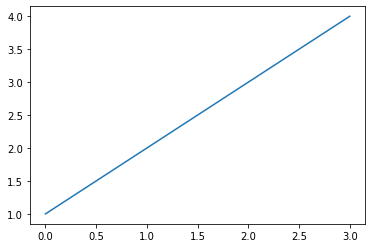

         3 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [35]:
%prun
plt.plot(range(1, 5))

In [38]:
%pinfo plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,